In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv('/content/train.csv.zip')
df.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [108]:
df.shape

(165034, 14)

In [109]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [111]:
pd.set_option("display.max_column",None)

In [112]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [113]:
df = df.drop(columns = ["id"])
df = df.drop(columns = ["CustomerId"])
df = df.drop(columns = ["Surname"])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [115]:
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0


In [116]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [117]:
print(df['Geography'].unique())

['France' 'Spain' 'Germany']


In [118]:
for col in df.columns:
  print(col, df[col].unique())
  print("-"*100)

CreditScore [668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 596 770 695 662 567 744 595
 736 724 751 646 670 741 543 754 691 641 679 523 621 589 582 642 600 732
 698 469 525 520 470 692 532 651 605 792 638 671 540 821 822 557 689 521
 604 628 568 597 556 449 717 713 536 657 452 719 564 484 816 825 512 531
 818 745 527 774 738 547 708 603 725 477 680 443 562 580 729 710 574 447
 497 656 550 766 728 653 537 609 704 772 781 697 428 757 666 522 453 643
 612 501 585 735 510 544 565 755 505 83

**NUMERICAL FEATURES ANALYSIS**

In [119]:
numerical_features_list = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*100)

Geography ['France' 'Spain' 'Germany']
----------------------------------------------------------------------------------------------------
Gender ['Male' 'Female']
----------------------------------------------------------------------------------------------------
HasCrCard [1. 0.]
----------------------------------------------------------------------------------------------------
IsActiveMember [0. 1.]
----------------------------------------------------------------------------------------------------
Exited [0 1]
----------------------------------------------------------------------------------------------------


In [120]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [122]:
print(df["Exited"].value_counts())

Exited
0    130113
1     34921
Name: count, dtype: int64


In [123]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(10,5))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"distribution of {column_name}")
  # calculate the mean and median values
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()
  #adding verticle lines for mean and median
  plt.axvline(col_mean, color='red', linestyle='--', label='mean')
  plt.axvline(col_median, color = 'blue', linestyle = '--', label='median')
  plt.legend()
  plt.show()

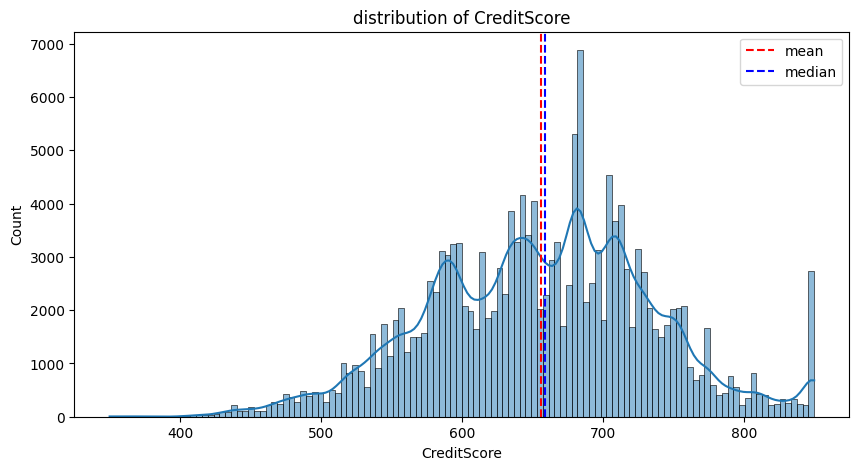

In [124]:
plot_histogram(df, "CreditScore")

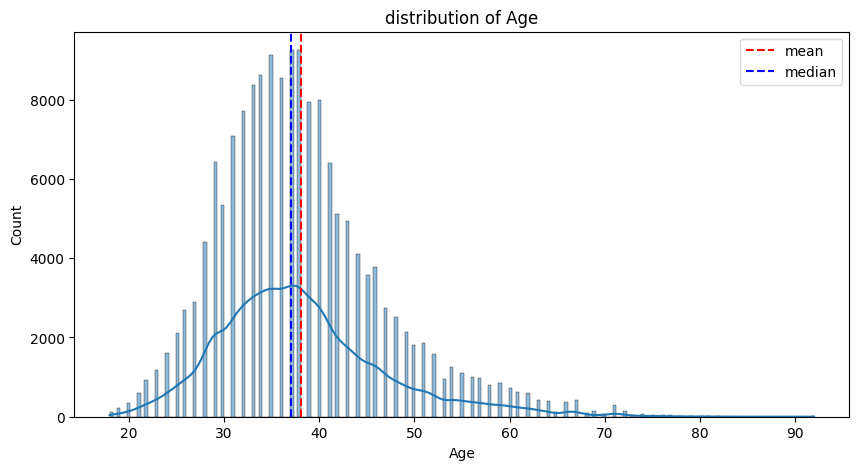

In [125]:
plot_histogram(df,"Age")

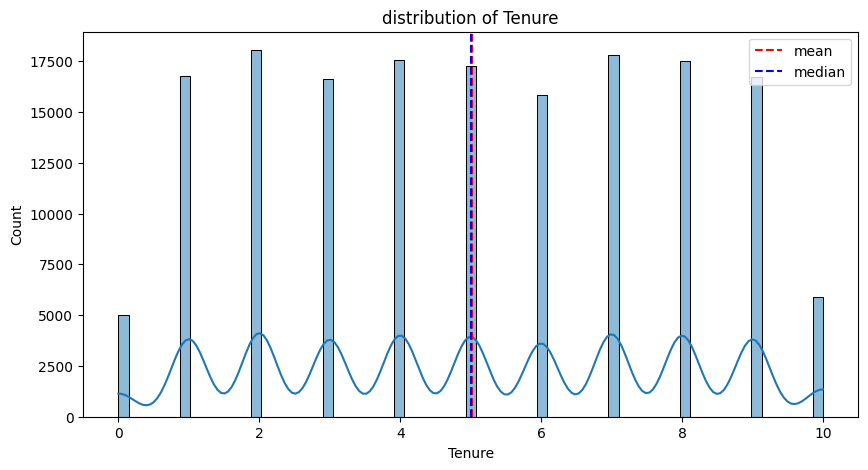

In [126]:
plot_histogram(df,"Tenure")

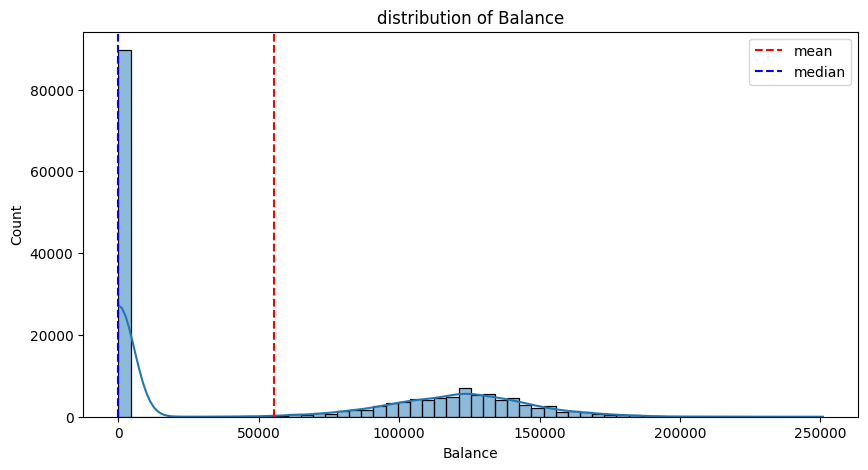

In [127]:
plot_histogram(df, "Balance")

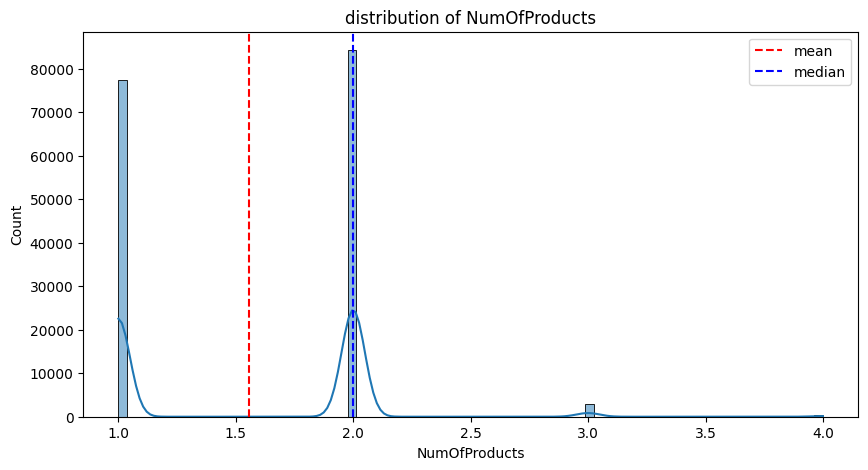

In [128]:
plot_histogram(df, "NumOfProducts")

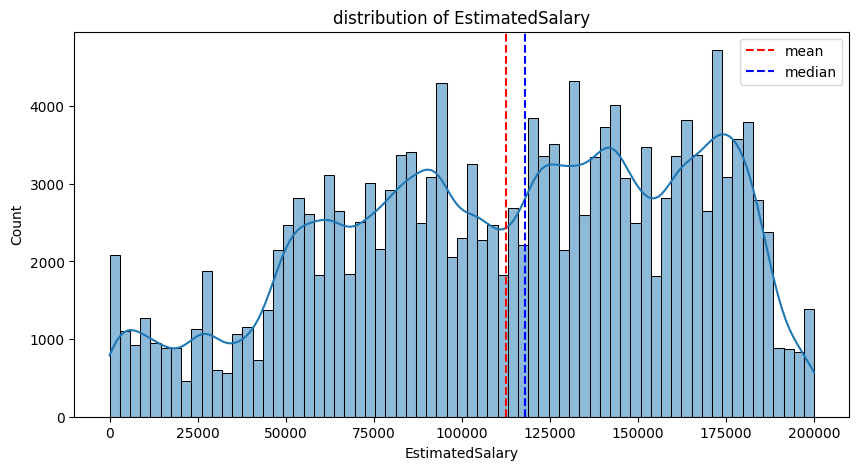

In [129]:
plot_histogram(df,"EstimatedSalary")

In [130]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(10,5))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

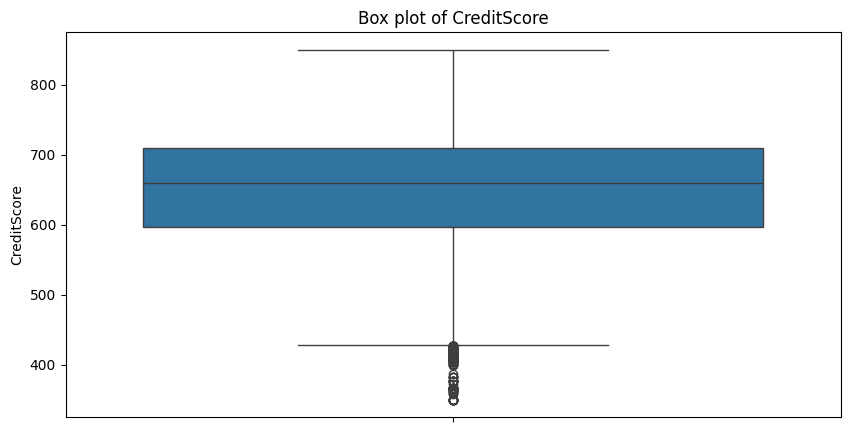

In [131]:
plot_boxplot(df,'CreditScore')

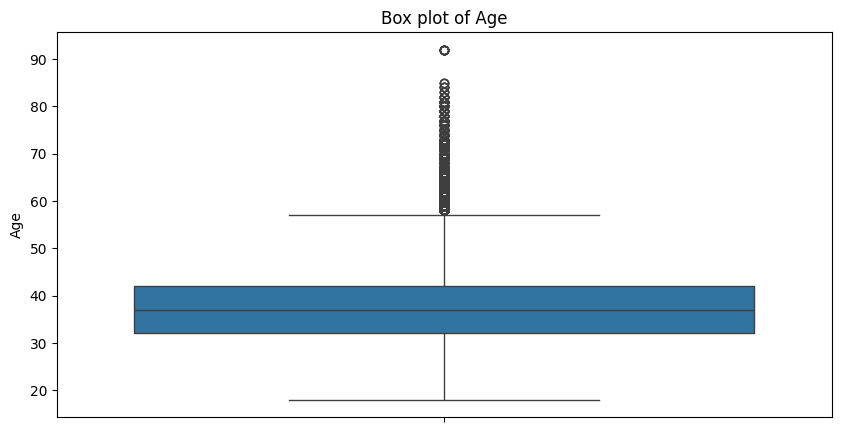

In [132]:
plot_boxplot(df,'Age')

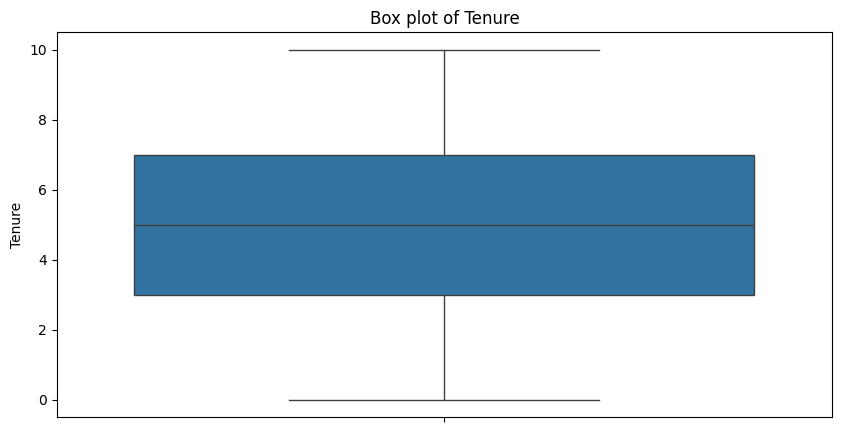

In [133]:
plot_boxplot(df,'Tenure')

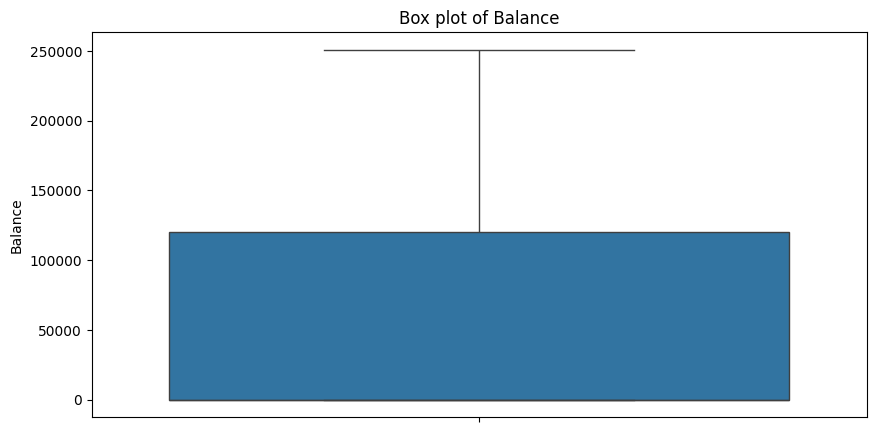

In [134]:
plot_boxplot(df,'Balance')

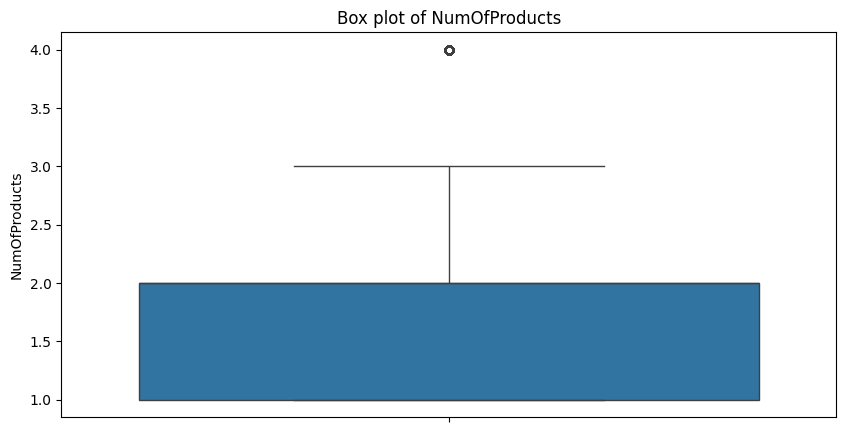

In [135]:
plot_boxplot(df,'NumOfProducts')

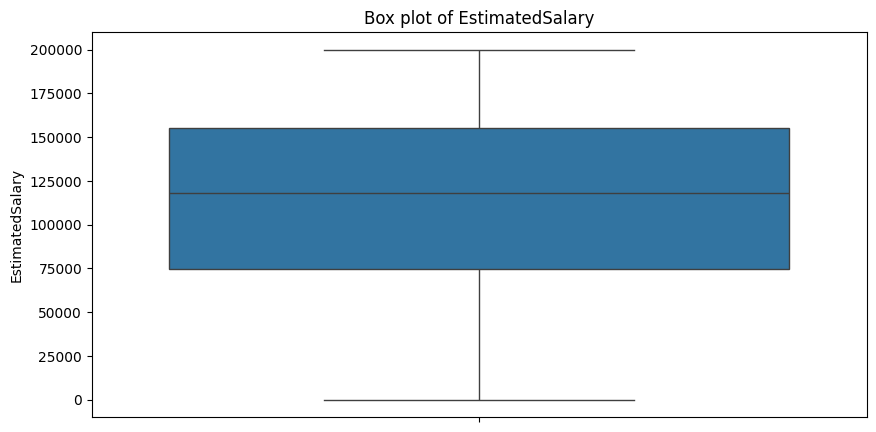

In [136]:
plot_boxplot(df,'EstimatedSalary')

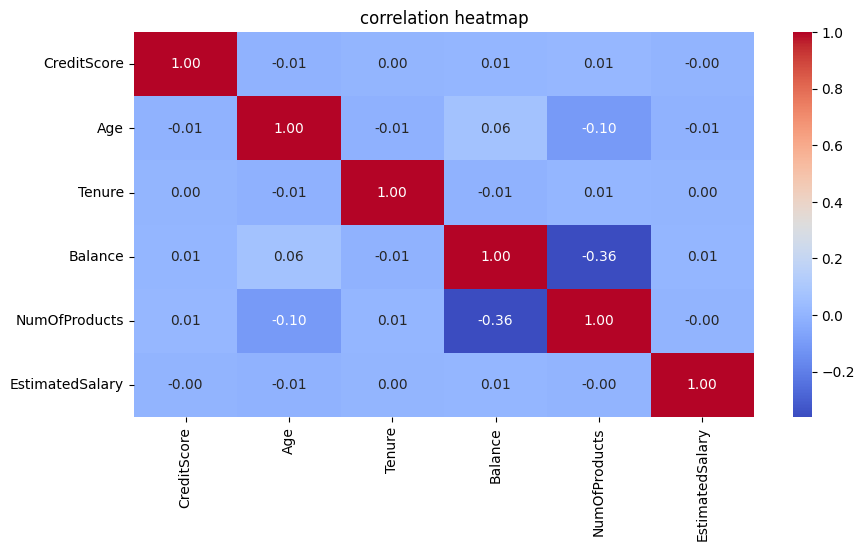

In [137]:
plt.figure(figsize=(10,5))
sns.heatmap(df[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("correlation heatmap")
plt.show()

**CATAGORICAL FEATURES ANALYSIS**

In [138]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [140]:
object_cols = df.select_dtypes(include=['object']).columns.to_list()
object_cols

['Geography', 'Gender']

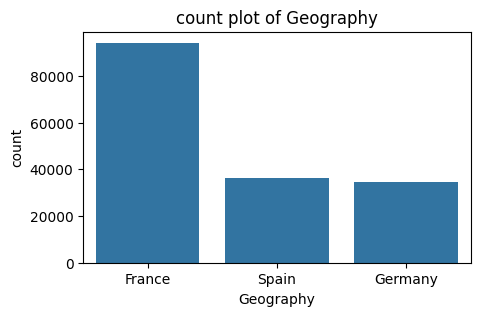

----------------------------------------------------------------------------------------------------


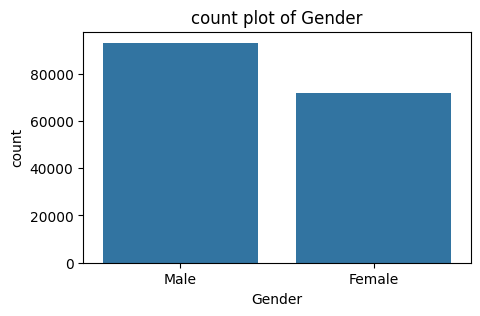

----------------------------------------------------------------------------------------------------


In [141]:
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=col, data=df)
  plt.title(f"count plot of {col}")
  plt.show()
  print("-"*100)

In [142]:
object_column = df.select_dtypes(include=['object']).columns

In [143]:
encoder = {}

#applying label encoder and storing the encoders
for column in object_column:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoder[column] = label_encoder

In [144]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric features you want to scale
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [145]:
with open("encoder.pkl","wb")as f:
  pickle.dump(encoder,f)

In [146]:
encoder

{'Geography': LabelEncoder(), 'Gender': LabelEncoder()}

In [147]:
x = df.drop(columns = ["Exited"])
y = df["Exited"]

In [148]:
print(x)
print("-"*100)
print(y)

        CreditScore  Geography  Gender   Age  Tenure    Balance  \
0               668          0       1  33.0       3       0.00   
1               627          0       1  33.0       1       0.00   
2               678          0       1  40.0      10       0.00   
3               581          0       1  34.0       2  148882.54   
4               716          2       1  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029          667          2       0  33.0       2       0.00   
165030          792          0       1  35.0       3       0.00   
165031          565          0       1  31.0       5       0.00   
165032          554          2       0  30.0       7  161533.00   
165033          850          0       1  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                   2        1.0             0.0        181449.97  
1                   2        1.0             1.0         49

In [149]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=42)

In [150]:
print(y_train.shape)

(132027,)


In [151]:
print(y_test.shape)

(33007,)


In [152]:
print(x_test.shape)

(33007, 10)


In [153]:
print(x_train.shape)

(132027, 10)


In [154]:
print(y_train.value_counts())

Exited
0    104061
1     27966
Name: count, dtype: int64


In [155]:
smote = SMOTE(random_state=42)

In [156]:
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [157]:
print(y_train_smote.value_counts())

Exited
0    104061
1    104061
Name: count, dtype: int64


**MODEL TRAINING**

In [158]:
# MODELS DICTIONARY
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42)
}

In [159]:
# dictionary to store the cross_validation results
cv_scores = {}
#performing 5 folds cross_validation for each model
for model_name, model in models.items():
  print(model_name)
  print(model)
  print("-"*100)


Logistic Regression
LogisticRegression(random_state=42)
----------------------------------------------------------------------------------------------------
Decision Tree
DecisionTreeClassifier(random_state=42)
----------------------------------------------------------------------------------------------------
Random Forest
RandomForestClassifier(random_state=42)
----------------------------------------------------------------------------------------------------
K-Nearest Neighbors
KNeighborsClassifier()
----------------------------------------------------------------------------------------------------
XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints

In [161]:
for model_name, model in models.items():
   print(f"training {model_name} by default parameters")
   scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")
   cv_scores[model_name] = scores
   print(f"{model_name} cross-validation accuracy : {np.mean(scores):.2f}")
   print ("-"*100)

training Logistic Regression by default parameters
Logistic Regression cross-validation accuracy : 0.71
----------------------------------------------------------------------------------------------------
training Decision Tree by default parameters
Decision Tree cross-validation accuracy : 0.85
----------------------------------------------------------------------------------------------------
training Random Forest by default parameters
Random Forest cross-validation accuracy : 0.89
----------------------------------------------------------------------------------------------------
training K-Nearest Neighbors by default parameters
K-Nearest Neighbors cross-validation accuracy : 0.71
----------------------------------------------------------------------------------------------------
training XGBoost by default parameters
XGBoost cross-validation accuracy : 0.88
----------------------------------------------------------------------------------------------------


In [162]:
cv_scores

{'Logistic Regression': array([0.67959159, 0.70606607, 0.7258793 , 0.72234768, 0.73601768]),
 'Decision Tree': array([0.68691892, 0.8448048 , 0.9022439 , 0.90397367, 0.90392562]),
 'Random Forest': array([0.73141141, 0.88449249, 0.93957813, 0.93796848, 0.9400346 ]),
 'K-Nearest Neighbors': array([0.69727327, 0.70130931, 0.72393331, 0.72491832, 0.72609552]),
 'XGBoost': array([0.70695495, 0.8867027 , 0.94068326, 0.94270133, 0.94503171])}

In [163]:
xgb = XGBClassifier(random_state=42)

In [164]:
xgb.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**MODEL EVALUATION**

In [165]:
print(y_test.value_counts())

Exited
0    26052
1     6955
Name: count, dtype: int64


In [166]:
y_test_pred = xgb.predict(x_test)
print("Accuracy score :\n",accuracy_score(y_test,y_test_pred))
print("-"*100)
print("Precision score :\n",precision_score(y_test,y_test_pred))
print("-"*100)
print("Recall score :\n",recall_score(y_test,y_test_pred))
print("-"*100)
print("F1 score :\n",f1_score(y_test,y_test_pred))
print("-"*100)
print("ROC AUC score :\n",roc_auc_score(y_test,y_test_pred))
print("-"*100)
print("confusion matrix :\n",confusion_matrix(y_test,y_test_pred))
print("-"*100)
print("classification report :\n",classification_report(y_test,y_test_pred))
print("-"*100)

Accuracy score :
 0.8590299027479019
----------------------------------------------------------------------------------------------------
Precision score :
 0.6851673101673101
----------------------------------------------------------------------------------------------------
Recall score :
 0.6123652048885694
----------------------------------------------------------------------------------------------------
F1 score :
 0.6467238630324197
----------------------------------------------------------------------------------------------------
ROC AUC score :
 0.768623106052453
----------------------------------------------------------------------------------------------------
confusion matrix :
 [[24095  1957]
 [ 2696  4259]]
----------------------------------------------------------------------------------------------------
classification report :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     26052
           1       0.69      0.61

**save and load the model and build predictive system**

In [167]:
model_data = {"model": xgb, "features": x.columns.to_list()}

with open("CUSTOMER_EXIT_PREDICTION.pkl", "wb") as f:
    pickle.dump(model_data, f)

In [168]:
with open("CUSTOMER_EXIT_PREDICTION.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features"]

In [169]:
print(loaded_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [170]:
print(feature_names)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [171]:
customer_data = {
    "CreditScore": 581,
    "Geography": "France",
    "Gender": "Male",
    "Age": 34,
    "Tenure": 2,
    "Balance": 148882.54,
    'NumOfProducts': 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 84560.88
}

input_data_df = pd.DataFrame([customer_data])

with open("encoder.pkl","rb") as f:
  encoder = pickle.load(f)

for column, encoder in encoder.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

In [172]:
input_data_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,581,0,1,34,2,148882.54,2,1,1,84560.88


In [173]:
prediction = xgb.predict(input_data_df)
print(prediction)
print(f"prediction: {'may-exit' if prediction [0] ==1 else 'no-exiting'}")

[0]
prediction: no-exiting


**DASHBOARD OR WESITE FOR THE CUSTOMER_CHURN_PREDICTION**

In [174]:
!pip install streamlit pyngrok --quiet

In [175]:
!ngrok config add-authtoken "2zywGxhmq42Np0vrLeN9xDCF2sA_MXPqhnVjgFqNuW5Qwx1B"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [186]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load model and encoders
model_data = pickle.load(open("CUSTOMER_EXIT_PREDICTION.pkl", "rb"))
model = model_data["model"]
encoders = pickle.load(open("encoder.pkl", "rb"))

st.title("Customer Churn Prediction App")

# Inputs
credit_score = st.number_input("Credit Score", min_value=300, max_value=900, value=650)
geography = st.selectbox("Geography", ["France", "Germany", "Spain"])
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.number_input("Age", min_value=18, max_value=100, value=40)
tenure = st.slider("Tenure", 0, 10, 3)
balance = st.number_input("Balance", value=60000.0)
num_of_products = st.selectbox("Number of Products", [1, 2, 3, 4])
has_cr_card = st.radio("Has Credit Card?", ["Yes", "No"])
is_active_member = st.radio("Is Active Member?", ["Yes", "No"])
estimated_salary = st.number_input("Estimated Salary", value=50000.0)

has_cr_card = 1 if has_cr_card == "Yes" else 0
is_active_member = 1 if is_active_member == "Yes" else 0

input_data = {
    'CreditScore': credit_score,
    'Geography': geography,
    'Gender': gender,
    'Age': age,
    'Tenure': tenure,
    'Balance': balance,
    'NumOfProducts': num_of_products,
    'HasCrCard': has_cr_card,
    'IsActiveMember': is_active_member,
    'EstimatedSalary': estimated_salary
}
input_df = pd.DataFrame([input_data])

# Apply encoders
for col, encoder in encoders.items():
    input_df[col] = encoder.transform(input_df[col])


if st.button("Predict"):
    prediction = model.predict(input_df)
    result = "HAVE A CHANCE TO CHURN" if prediction[0] == 1 else "NO CHURN BEHAVIOUR"
    st.subheader(f"Prediction: {result}")

Overwriting app.py


In [177]:
from google.colab import files
uploaded = files.upload()


Saving encoder.pkl to encoder (2).pkl


In [178]:
import os
os.listdir()

['.config',
 'app.py',
 'train.csv.zip',
 'CUSTOMER_EXIT_PREDICTION.pkl',
 'encoder.pkl',
 'encoder (2).pkl',
 'encoder (1).pkl',
 'sample_data']

In [183]:
from pyngrok import conf
conf.get_default().auth_token = "2zywGxhmq42Np0vrLeN9xDCF2sA_MXPqhnVjgFqNuW5Qwx1B"

In [187]:
from pyngrok import ngrok

# Kill any running streamlit processes
!pkill streamlit

# Start tunnel
public_url = ngrok.connect(8501, "http")
print(f"Streamlit app URL: {public_url}")

# Run the app
!streamlit run app.py &

Streamlit app URL: NgrokTunnel: "https://215612ab94aa.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.71.54.74:8501

  Stopping...
